### GSAM

In [11]:
import os
import sys
sys.path.append('../realrobot')
from utils_gsam import *

In [12]:
GSAM = GroundedSAM('/home/gun/Desktop/Grounded-Segment-Anything/')

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Classifier

In [13]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import resnet18

In [14]:
resnet = resnet18

model_path = 'data/classification-best/top_nobg_linspace_mse-best.pth'
device = "cuda:0"

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    #nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

### Get Segmentation Masks

In [15]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image

In [30]:
fname.replace('_img.png', '_seg.png').replace('experiments-results', 'experiments-results/processed')

'experiments-results/processed/SF-scene-2_seg.png'

Before NMS: 1 boxes
After NMS: 1 boxes
experiments-results/SD-scene-4_img.png


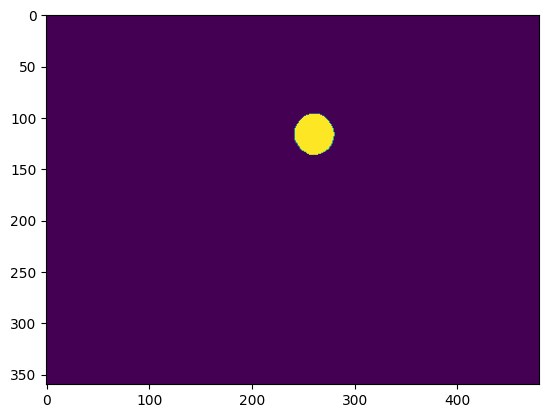

In [52]:
fname = 'experiments-results/SD-scene-4_img.png'

img = Image.open(fname)
data = np.array(img)
expect_img = Image.open(fname.replace('real', 'expect'))
expt = np.array(expect_img)

# image = data.astype(np.uint8)
image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)

classes = ['bowl', 'fork', 'knife', 'apple', 'banana', 'cup']
classes = ['apple']
detection = GSAM.get_masks(image, classes)
#detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
segmask = np.zeros_like(detection.mask[0]).astype(int)
midx = 1
for mask in detection.mask:
    if mask.sum() < 40000:
        segmask[mask] = midx
        midx += 1

fmask = segmask.astype(bool).astype(int)
x = data[:, :, :3]/255 * fmask[:, :, None]

x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
x_seg = segmask[65:425, 90:570]
print(fname)
plt.imshow(x_seg)
plt.show()
apple_seg = x_seg

Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/SD-scene-4_img.png


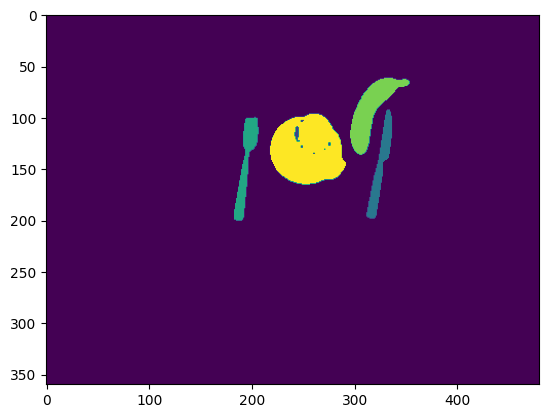

In [53]:
fname = 'experiments-results/SD-scene-4_img.png'

img = Image.open(fname)
data = np.array(img)
expect_img = Image.open(fname.replace('real', 'expect'))
expt = np.array(expect_img)

# image = data.astype(np.uint8)
image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)

classes = ['bowl', 'fork', 'knife', 'apple', 'banana', 'cup']
detection = GSAM.get_masks(image, classes)
#detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
segmask = np.zeros_like(detection.mask[0]).astype(int)
midx = 1
for mask in detection.mask:
    if mask.sum() < 40000:
        segmask[mask] = midx
        midx += 1

fmask = segmask.astype(bool).astype(int)
x = data[:, :, :3]/255 * fmask[:, :, None]

x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
x_seg = segmask[65:425, 90:570]
print(fname)
plt.imshow(x_seg)
plt.show()

In [57]:
x_seg[apple_seg==1] = 1

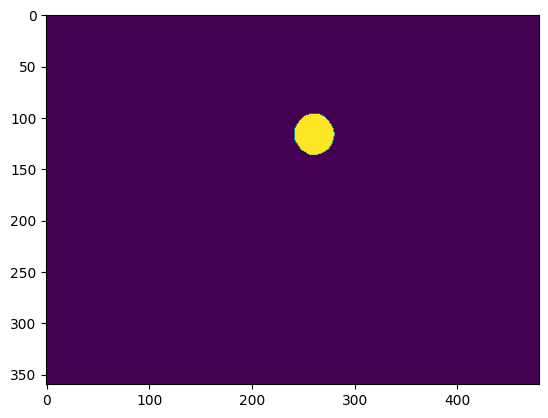

In [76]:
plt.imshow(x_seg==1)

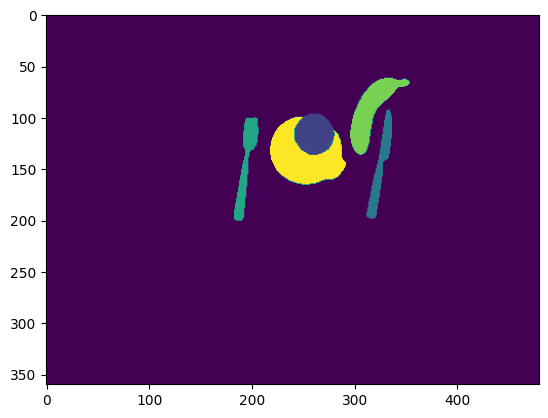

In [68]:
plt.imshow(x_seg)

In [66]:
img_savename = fname.replace('experiments-results', 'experiments-results/processed')
seg_savename = img_savename.replace('_img.png', '_seg.png')
cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
cv2.imwrite(seg_savename, x_seg)

True

In [23]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments-results', f) for f in os.listdir('experiments-results') if f.endswith('.png')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
#     print(fname)
#     plt.imshow(x_seg)
#     plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[65:425, 90:570][None, :, :, :].transpose([0,3,1,2])
    #x_eval = x[56:428, 81:575][None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 5 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After

In [24]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments-results', f) for f in os.listdir('experiments-results') if f.endswith('.png')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
#     print(fname)
#     plt.imshow(x_seg)
#     plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 5 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/disturb-0.png


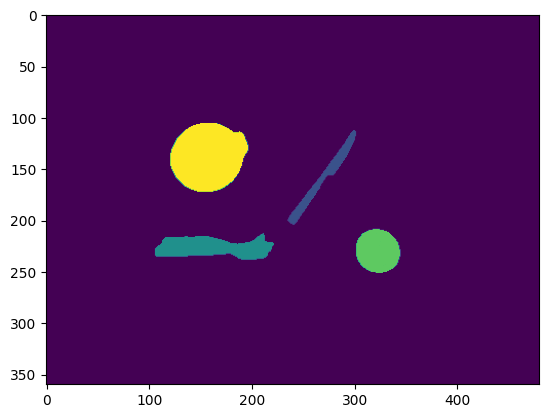

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
experiments-results/disturb-1.png


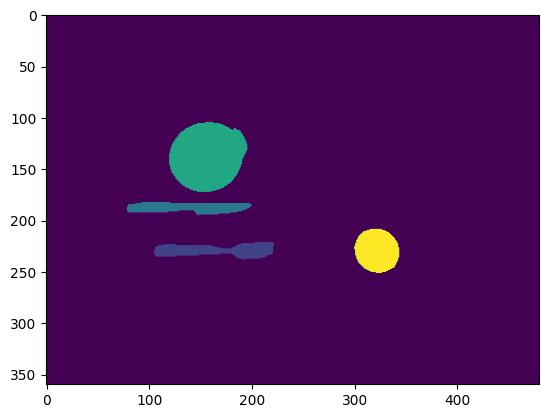

Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/disturb-2.png


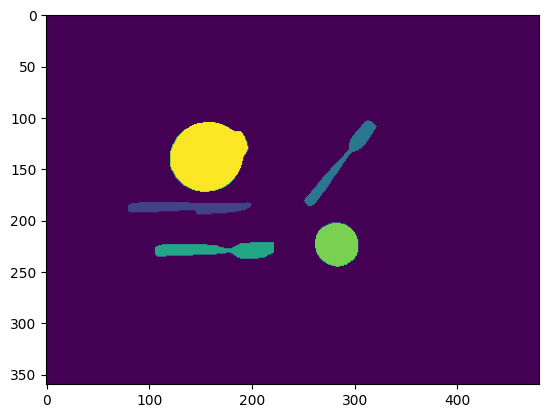

Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 7 boxes
After NMS: 7 boxes
experiments-results/disturb-3.png


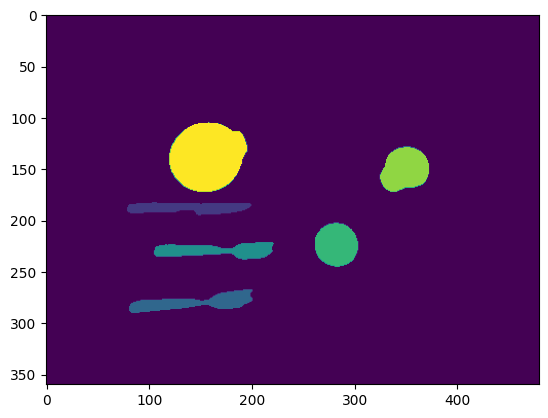

Before NMS: 7 boxes
After NMS: 7 boxes
Before NMS: 7 boxes
After NMS: 7 boxes
experiments-results/disturb-4.png


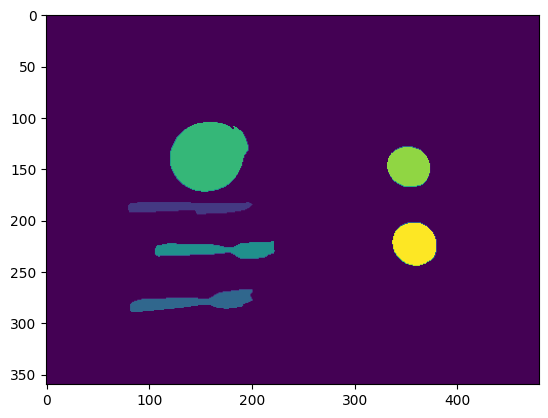

Before NMS: 7 boxes
After NMS: 7 boxes

experiments-results/disturb-0.png 0.45282125
experiments-results/disturb-1.png 0.81551963
experiments-results/disturb-2.png 0.6739756
experiments-results/disturb-3.png 0.8287599
experiments-results/disturb-4.png 0.8847908


In [26]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments-results', f) for f in os.listdir('experiments-results') if f.endswith('.png') and f.startswith('disturb')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
    print(fname)
    plt.imshow(x_seg)
    plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/expect_0.png


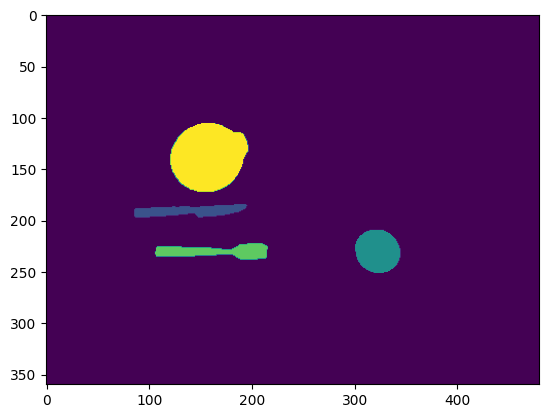

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/expect_1.png


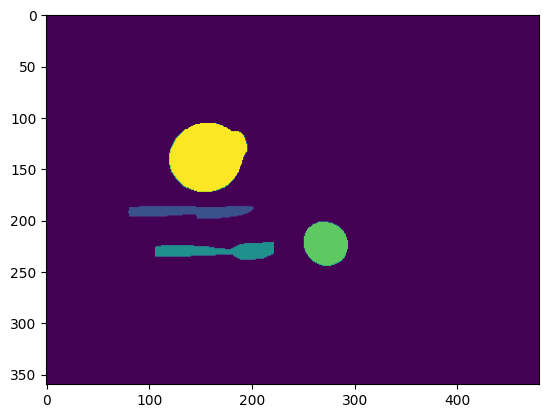

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/expect_2.png


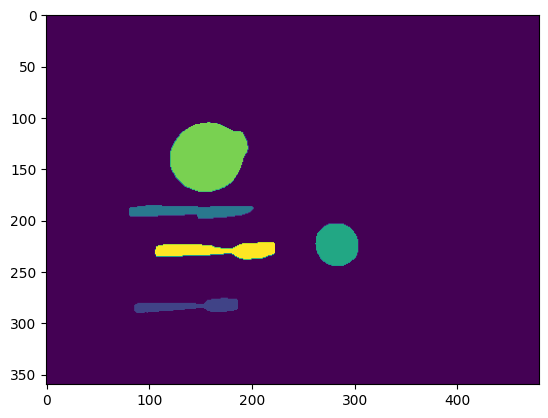

Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
experiments-results/expect_3.png


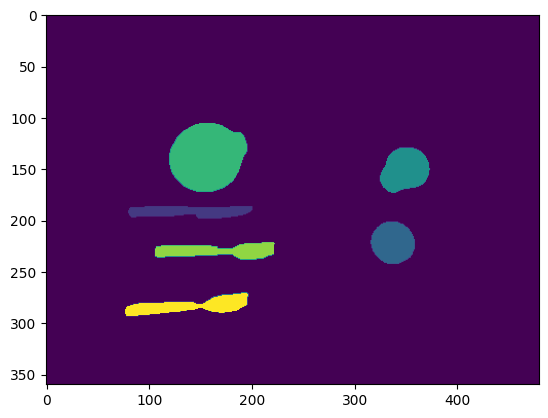

Before NMS: 6 boxes
After NMS: 6 boxes

experiments-results/expect_0.png 0.78903466
experiments-results/expect_1.png 0.9067665
experiments-results/expect_2.png 0.8981791
experiments-results/expect_3.png 0.8863154


In [27]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments-results', f) for f in os.listdir('experiments-results') if f.endswith('.png') and f.startswith('expect')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
    print(fname)
    plt.imshow(x_seg)
    plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S1-mcts-0217_1749/initial.png


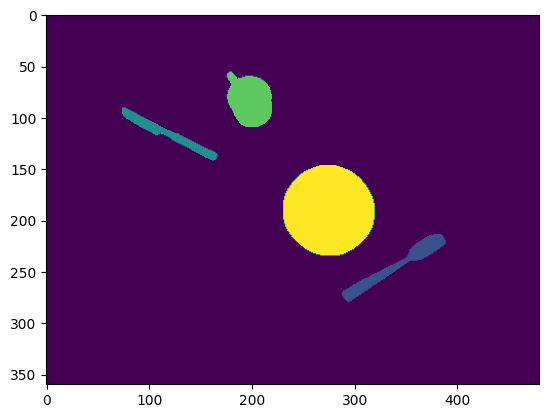

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S1-mcts-0217_1749/real_0.png


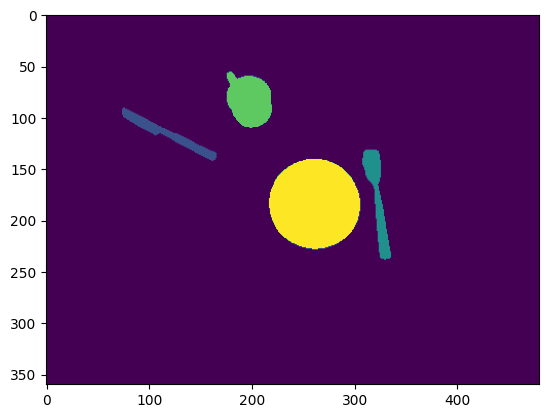

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S1-mcts-0217_1749/real_1.png


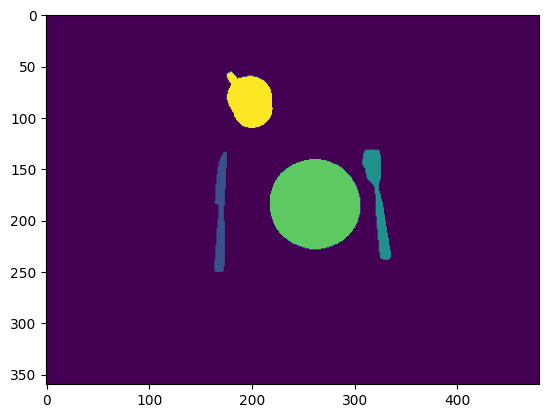

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S1-mcts-0217_1749/real_2.png


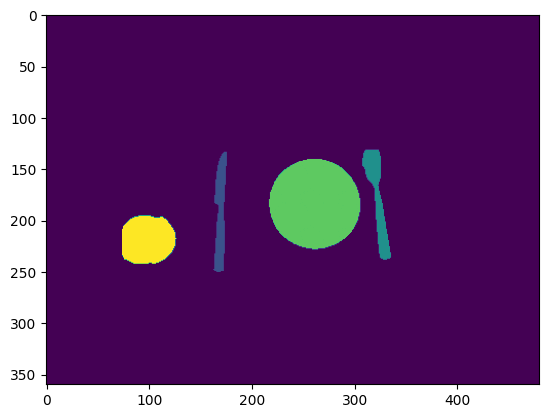

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 5 boxes
After NMS: 4 boxes
experiments/New/S1-mcts-0217_1749/real_3.png


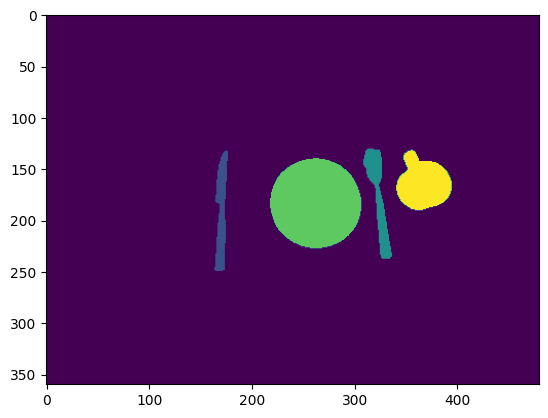

Before NMS: 5 boxes
After NMS: 4 boxes

experiments/New/S1-mcts-0217_1749/initial.png 0.21358176
experiments/New/S1-mcts-0217_1749/real_0.png 0.35225573
experiments/New/S1-mcts-0217_1749/real_1.png 0.5945702
experiments/New/S1-mcts-0217_1749/real_2.png 0.77849716
experiments/New/S1-mcts-0217_1749/real_3.png 0.84089047


In [28]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments/New/S1-mcts-0217_1749', f)
         for f in os.listdir('experiments/New/S1-mcts-0217_1749')
         if f.endswith('.png') and f.startswith('initial') or f.startswith('real')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
    print(fname)
    plt.imshow(x_seg)
    plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/initial.png


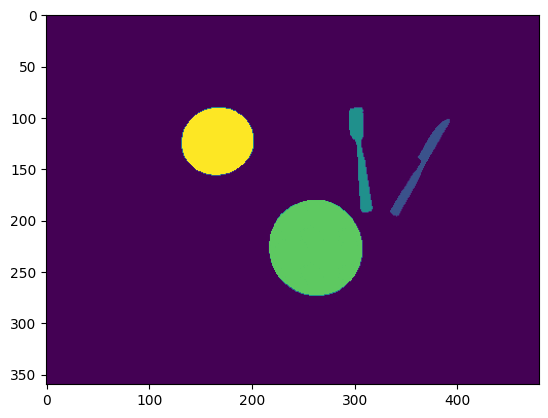

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_0.png


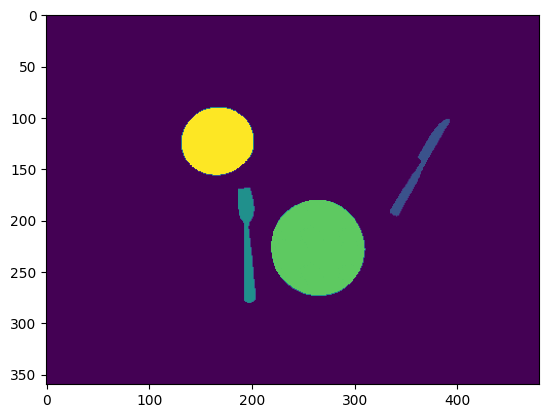

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_1.png


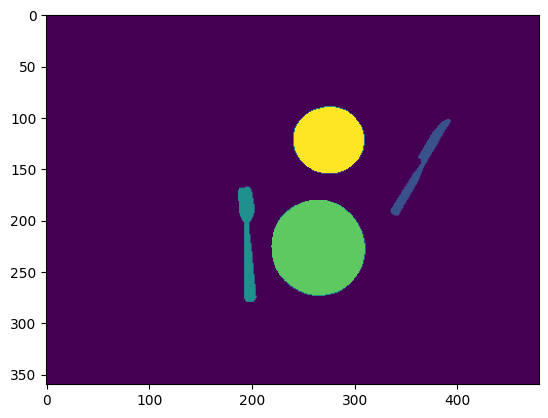

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_2.png


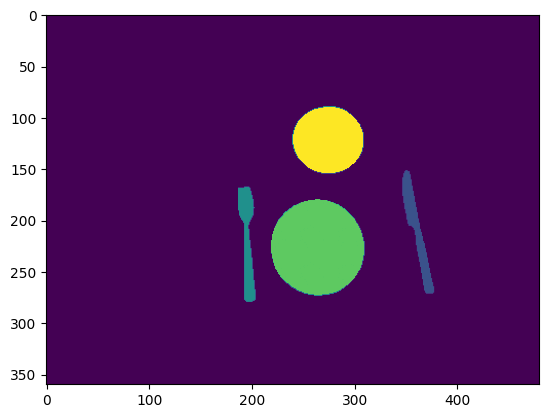

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_3.png


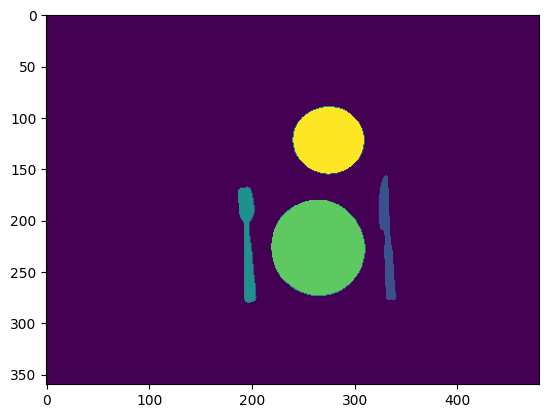

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_4.png


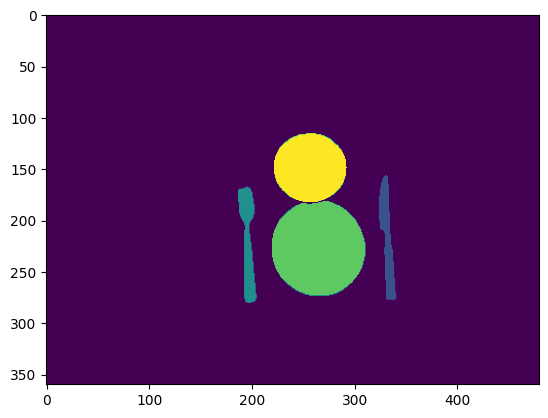

Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
experiments/New/S2-mcts-0217_2010/real_5.png


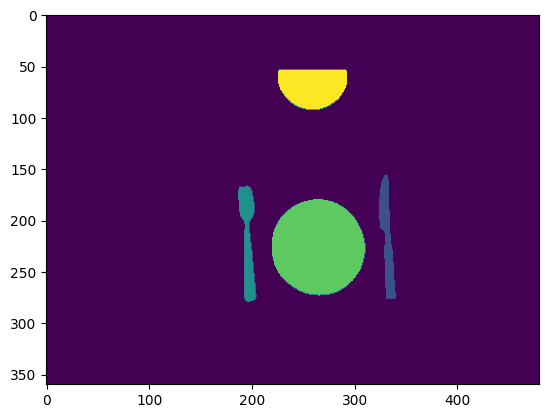

Before NMS: 4 boxes
After NMS: 4 boxes

experiments/New/S2-mcts-0217_2010/initial.png 0.40271452
experiments/New/S2-mcts-0217_2010/real_0.png 0.53388727
experiments/New/S2-mcts-0217_2010/real_1.png 0.5976718
experiments/New/S2-mcts-0217_2010/real_2.png 0.6298899
experiments/New/S2-mcts-0217_2010/real_3.png 0.8507461
experiments/New/S2-mcts-0217_2010/real_4.png 0.8419946
experiments/New/S2-mcts-0217_2010/real_5.png 0.7817331


In [30]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']

fnames = []
scores = []

files = [os.path.join('experiments/New/S2-mcts-0217_2010', f)
         for f in os.listdir('experiments/New/S2-mcts-0217_2010')
         if f.endswith('.png') and f.startswith('initial') or f.startswith('real')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
    print(fname)
    plt.imshow(x_seg)
    plt.show()
    
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)
#             ax1.imshow(data)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    fmask = np.zeros_like(detection.mask[0])
    for mask in detection.mask:
        if mask.sum() < 40000:
            fmask += mask
    fmask = fmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()

    x_eval = x[None, :, :, :].transpose([0,3,1,2])
    x_eval = torch.from_numpy(x_eval).type(torch.float)
    X_eval = preprocess(x_eval).to(device)
    y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
    score = y_pred[0]
    
    fnames.append(fname)
    scores.append(score)

print()
for i in range(len(fnames)):
    print(fnames[i], scores[i])
    
    #img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    #seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SD-scene-1_img.png


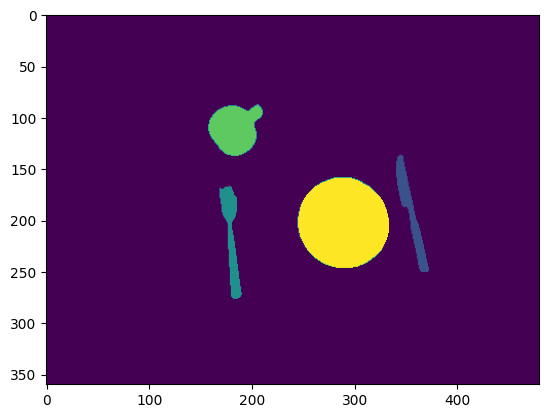

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SD-scene-2_img.png


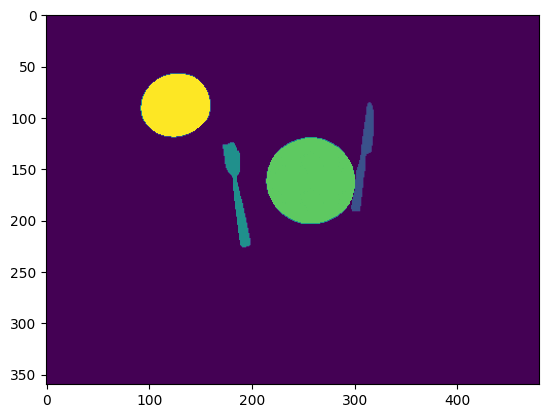

Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/SD-scene-3_img.png


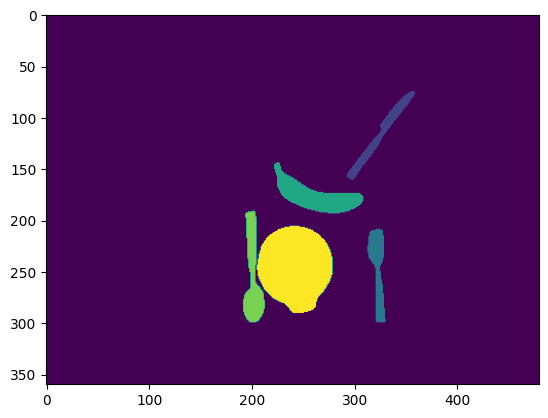

Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/SD-scene-4_img.png


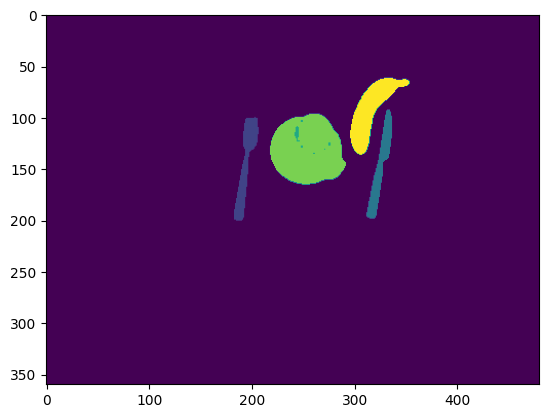

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SD-scene-5_img.png


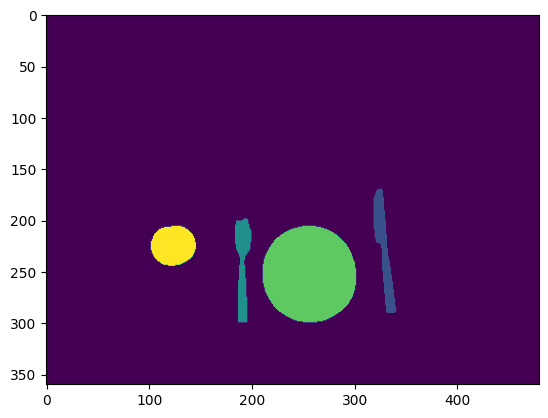

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SF-scene-1_img.png


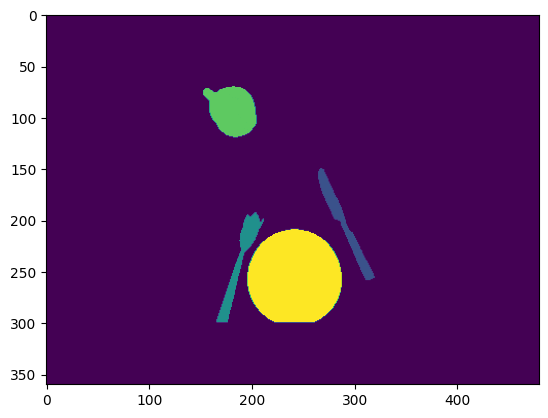

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SF-scene-2_img.png


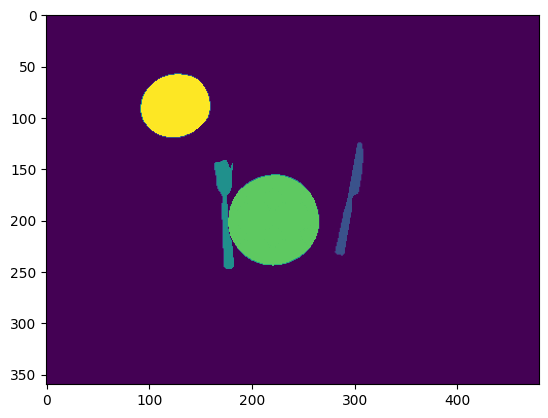

Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/SF-scene-3_img.png


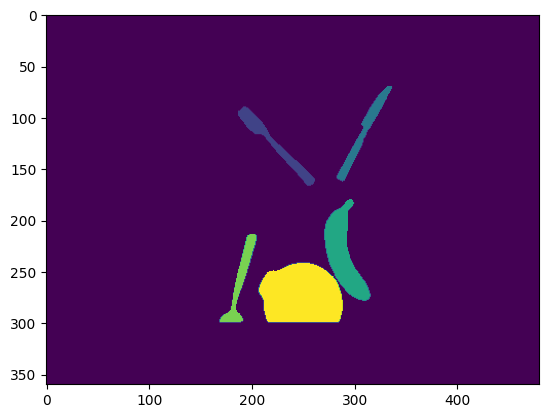

Before NMS: 6 boxes
After NMS: 6 boxes
experiments-results/SF-scene-4_img.png


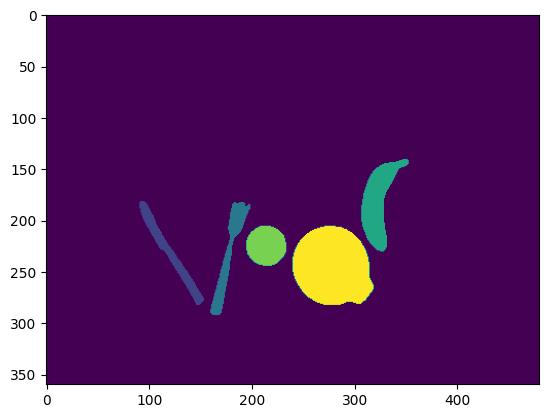

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/SF-scene-5_img.png


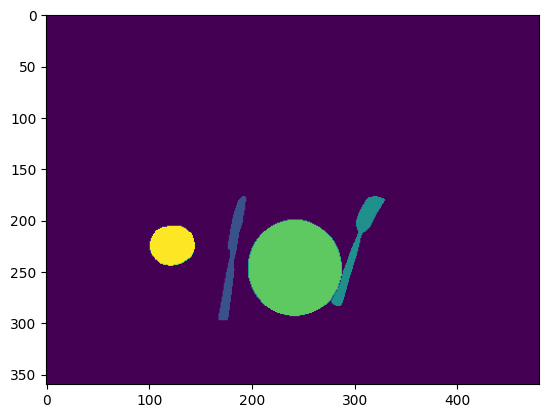

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/TS-scene-1_img.png


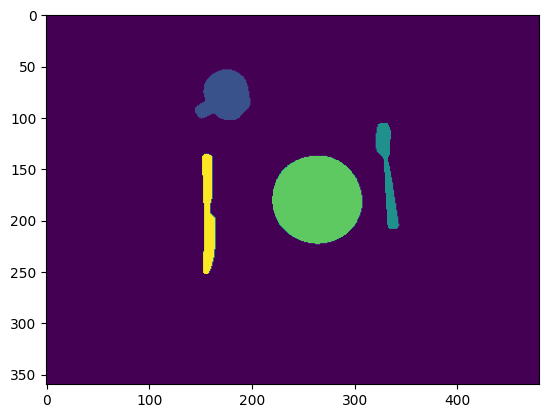

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/TS-scene-2_img.png


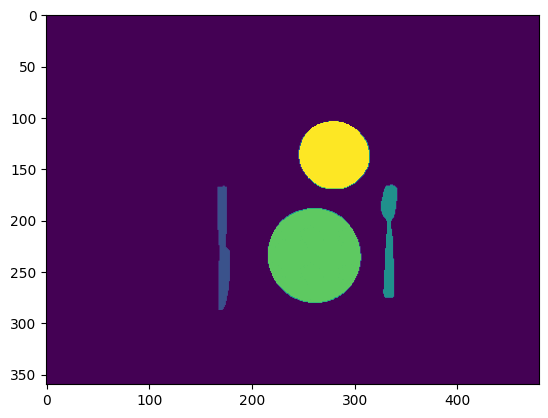

Before NMS: 5 boxes
After NMS: 5 boxes
experiments-results/TS-scene-3_img.png


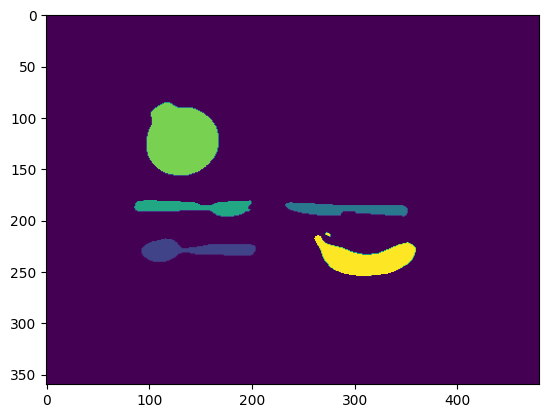

Before NMS: 6 boxes
After NMS: 6 boxes
experiments-results/TS-scene-4_img.png


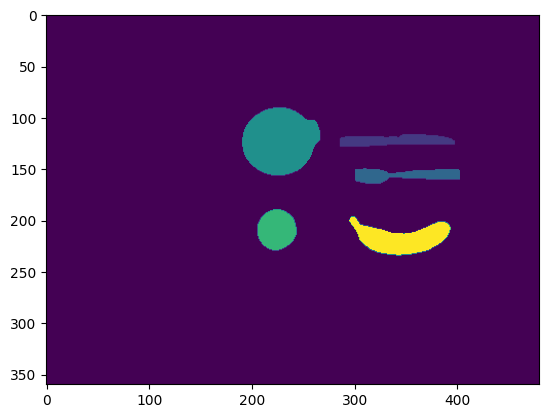

Before NMS: 4 boxes
After NMS: 4 boxes
experiments-results/TS-scene-5_img.png


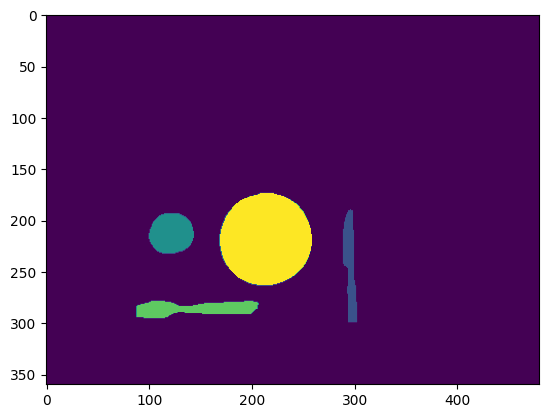

In [39]:
result = {}
classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']


files = [os.path.join('experiments-results', f) for f in os.listdir('experiments-results') if f.endswith('.png')]        
files = sorted(files)
for fname in files:
    img = Image.open(fname)
    data = np.array(img)
    expect_img = Image.open(fname.replace('real', 'expect'))
    expt = np.array(expect_img)

    image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
    detection = GSAM.get_masks(image, classes)
    #detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
    segmask = np.zeros_like(detection.mask[0]).astype(int)
    midx = 1
    for mask in detection.mask:
        if mask.sum() < 40000:
            segmask[mask] = midx
            midx += 1
            
    fmask = segmask.astype(bool).astype(int)
    x = data[:, :, :3]/255 * fmask[:, :, None]
    
    x_img = (x[65:425, 90:570] * 255).astype(np.uint8)
    x_seg = segmask[65:425, 90:570]
    print(fname)
    plt.imshow(x_seg)
    plt.show()
    
    img_savename = fname.replace('experiments-results', 'experiments-results/processed')
    seg_savename = img_savename.replace('_img.png', '_seg.png')
    #cv2.imwrite(img_savename,  cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR))
    #cv2.imwrite(seg_savename, x_seg)
    
    if False:
        x_eval = x[65:425, 90:570][None, :, :, :].transpose([0,3,1,2])
        #x_eval = x[56:428, 81:575][None, :, :, :].transpose([0,3,1,2])
        x_eval = torch.from_numpy(x_eval).type(torch.float)
        X_eval = preprocess(x_eval).to(device)
        y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
        score = y_pred[0]
        print("fname", fname)
        print("Score:", score)
        print()
    

In [25]:
x.shape

(480, 640, 3)

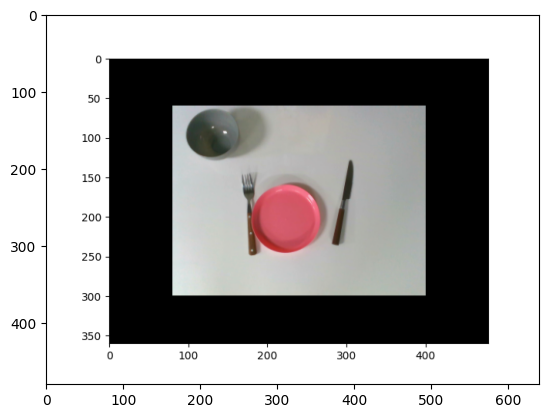

In [22]:
plt.imshow(data)

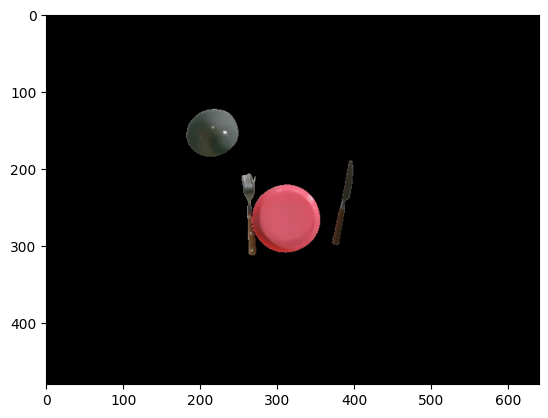

In [21]:
plt.imshow(x)

In [20]:
x.shape

(480, 640, 3)

In [19]:
fname

'experiments-results/SF-scene-2_img.png'

In [18]:
fmask.max()

4

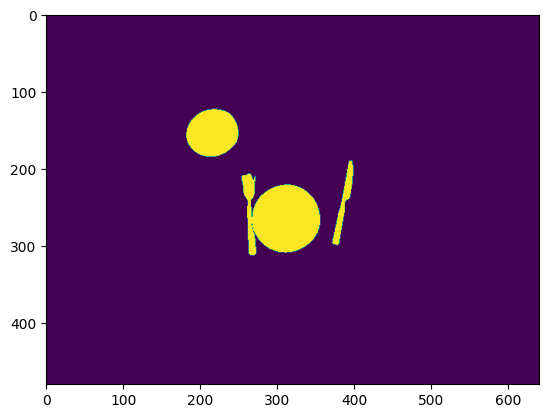

In [8]:
plt.imshow(fmask)

### Experiment Results

In [3]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image

In [35]:
result = {}
for sname in ['Coffee', 'Dining', 'Office', 'Bathroom']:
    result[sname] = {}
    if sname == 'Coffee':
        classes = ['plate', 'cup', 'box', 'teabox']
    elif sname =='Dining':
        classes = ['plate', 'fork', 'knife', 'spoon', 'banana', 'fruit', 'cup']
    elif sname == 'Office':
        classes = ['stapler', 'notebook', 'pen', 'marker', 'cup', 'eraser', 'block']
    elif sname == 'Bathroom':
        classes = ['vaseline', 'cup', 'soap', 'eraser', 'brush', 'toothpaste', 'toothbrush', 'tube', 'scrubber', 'box']
        #classes = ['brush', 'toothpaste', 'toothbrush', 'tube', 'scrubber', 'box', 'soap', 'eraser']
        
    traj_list = sorted(os.listdir(os.path.join('experiments', sname)))
    for tname in traj_list:
        result[sname][tname.split(' ')[0]] = {
                                        'score': [],
                                        'rgb': [],
                                        'nobg': [],
                                        'expect': [],
                                    }
        
        files = os.listdir(os.path.join('experiments', sname, tname))
        files = sorted([
            os.path.join('experiments', sname, tname, f) for f in files 
            if f.startswith('initial') or f.startswith('real_')
        ])
        
        for fname in files:
#             fig = plt.figure()
#             ax1 = fig.add_subplot(121)
#             ax2 = fig.add_subplot(122)
            
            img = Image.open(fname)
            data = np.array(img)
            expect_img = Image.open(fname.replace('real', 'expect'))
            expt = np.array(expect_img)
#             ax1.imshow(data)
            
            image = cv2.cvtColor(data.astype(np.uint8), cv2.COLOR_RGB2BGR)
            detection = GSAM.get_masks(image, classes)
#             detection = GSAM.get_masks(image, classes, box_threshold=0.17, text_threshold=0.17, nms_threshold=0.6)
            fmask = np.zeros_like(detection.mask[0])
            for mask in detection.mask:
                if mask.sum() < 40000:
                    fmask += mask
            fmask = fmask.astype(bool).astype(int)
            x = data[:, :, :3]/255 * fmask[:, :, None]
#             ax2.imshow(x)
#             plt.show()
            
            x_eval = x[65:425, 90:570][None, :, :, :].transpose([0,3,1,2])
            #x_eval = x[56:428, 81:575][None, :, :, :].transpose([0,3,1,2])
            x_eval = torch.from_numpy(x_eval).type(torch.float)
            X_eval = preprocess(x_eval).to(device)
            y_pred = model(X_eval)[:, 0].detach().cpu().numpy()
            score = y_pred[0]
#             print("Score:", score)
            result[sname][tname.split(' ')[0]]['rgb'].append(data[:, :, :3])
            result[sname][tname.split(' ')[0]]['nobg'].append(x)
            result[sname][tname.split(' ')[0]]['score'].append(score)
            result[sname][tname.split(' ')[0]]['expect'].append(expt[:, :, :3])

Before NMS: 5 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 4 boxes
Before NMS: 4 boxes
After NMS: 3 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 6 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 7 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 6 boxes
After NMS: 6 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
Before NMS: 5 boxes
After NMS: 5 boxes
There's a wrong phrase happen, this is because of our post-process merged wrong tokens, which will be modified in the future. We will assign it with a random label at this time.
Before NMS: 9 boxes
After NMS: 7 boxes
Before NMS: 8 boxes
After NMS: 7 boxes
Before NMS: 7 boxes
After NMS: 7 boxes
Before NMS: 8 boxes
After NMS: 7 boxes
Before NMS: 10 boxes
After NMS: 8 boxes
There's a wrong phrase happen, this is be

In [1]:
H, W = 281, 333
for env in ['Office']: # ['Coffee', 'Dining', 'Office', 'Bathroom']:
    fimg = np.ones([(H * 2 + 70) * len(result[env].keys()), (W * 12), 3])
    fig = plt.figure(figsize=(15, 15))

    for si, scene in enumerate(result[env].keys()):
        scores = result[env][scene]['score']
        imgs = result[env][scene]['rgb']
        #xpects = result[env][scene]['expect']
        nobgs = result[env][scene]['nobg']


        img_cat = np.concatenate([im[116:116+H, 162:495]/255. for im in imgs], 1)
        nobg_cat = np.concatenate([im[116:116+H, 162:495] for im in nobgs], 1)
        fimg[50+(H*2+70)*si: 50+(H*2+70)*si + H, :img_cat.shape[1]] = img_cat
        fimg[50+(H*2+70)*si + H+20: 50+(H*2+70)*si + H + H+20, W:img_cat.shape[1]] = nobg_cat[:,W:]#/255.
        
        for k, score in enumerate(scores):
            plt.text(W*k+100, (H*2+70)*si + 40, '%.3f'%score, fontsize=10)
    plt.imshow(fimg)
    plt.show()
    #plt.savefig('result_final_%s.jpg'%env)
    plt.cla()
    #cv2.imwrite('result_final_%s.jpg'%env, cv2.cvtColor((fimg*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

NameError: name 'np' is not defined

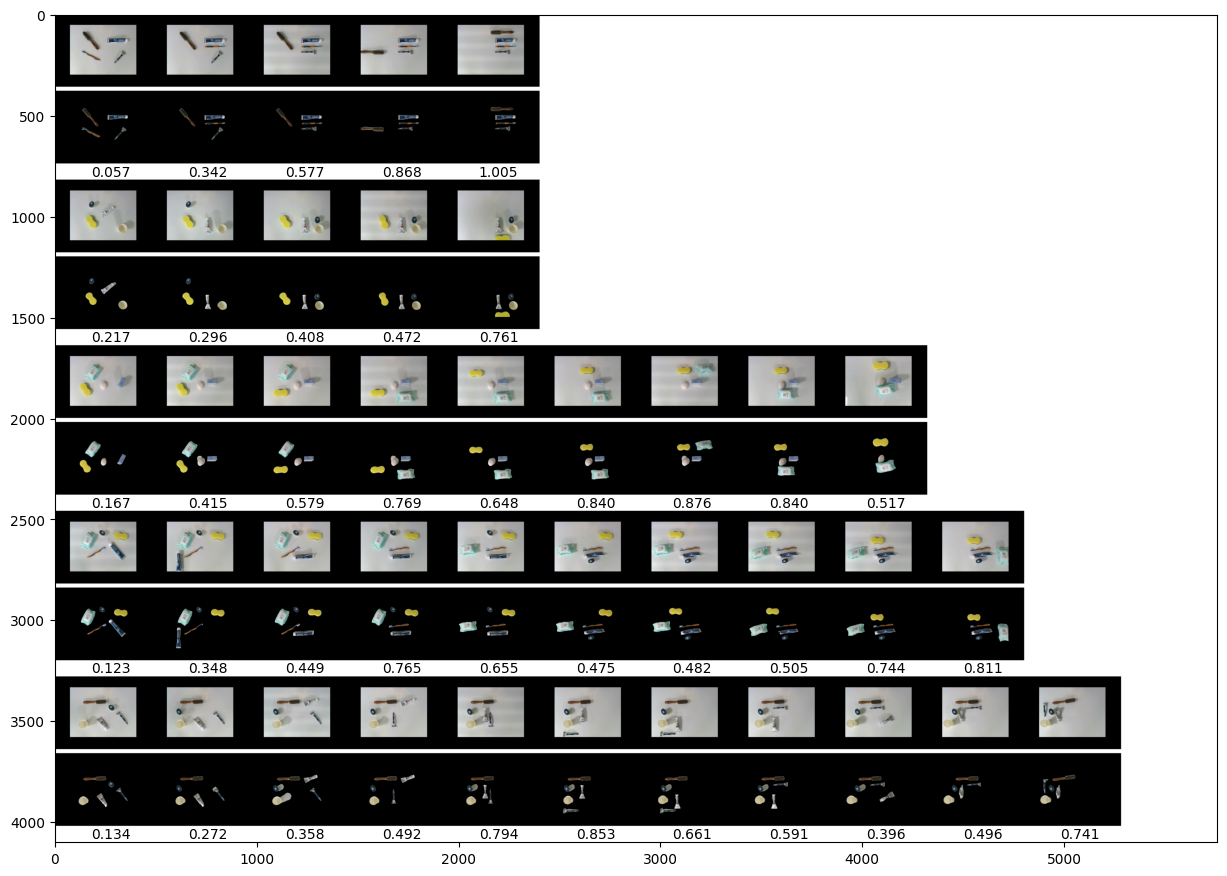

In [28]:
H, W = 360, 480
env = 'Bathroom' #'Coffee', 'Dining', 'Office', 'Bathroom']
fimg = np.ones([(360 * 2 + 100) * len(result[env].keys()), (480 * 12), 3])
fig = plt.figure(figsize=(15, 15))

for si, scene in enumerate(result[env].keys()):
    scores = result[env][scene]['score']
    imgs = result[env][scene]['rgb']
    nobgs = result[env][scene]['nobg']
    
    
    img_cat = np.concatenate([im[65:425, 90:570]/255. for im in imgs], 1)
    nobg_cat = np.concatenate([im[65:425, 90:570] for im in nobgs], 1)
    fimg[(360*2+100)*si: (360*2+100)*si + 360, :img_cat.shape[1]] = img_cat
    fimg[(360*2+100)*si + 360+20: (360*2+100)*si + 360 + 360+20, :img_cat.shape[1]] = nobg_cat
    
    for k, score in enumerate(scores):
        plt.text(480*k+180, (360*2+100)*si + 360+360+80, '%.3f'%score, fontsize=10)

plt.imshow(fimg)
plt.show()

In [178]:
x.shape
x[56:428, 81:575].shape
x[65:425, 90:570].shape

dict_keys(['S1-', 'S2', 'S3', 'S4', 'S5'])

In [4]:
import pickle

In [30]:
with open('result.pkl', 'wb') as f:
    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)

In [31]:
import cv2

In [42]:
H, W = 360, 480
for env in ['Coffee', 'Dining', 'Office', 'Bathroom']:
    fimg = np.ones([(360 * 2 + 100) * len(result[env].keys()), (480 * 12), 3])
    fig = plt.figure(figsize=(15, 15))

    for si, scene in enumerate(result[env].keys()):
        scores = result[env][scene]['score']
        imgs = result[env][scene]['rgb']
        expects = result[env][scene]['expect']
        #nobgs = result[env][scene]['nobg']


        img_cat = np.concatenate([im[65:425, 90:570]/255. for im in imgs], 1)
        expect_cat = np.concatenate([im[65:425, 90:570] for im in expects], 1)
        fimg[(360*2+100)*si: (360*2+100)*si + 360, :img_cat.shape[1]] = img_cat
        fimg[(360*2+100)*si + 360+20: (360*2+100)*si + 360 + 360+20, 480:img_cat.shape[1]] = expect_cat[:,480:]/255.
    plt.imshow(fimg)
    plt.show()
    #cv2.imwrite('result_%s.jpg'%env, cv2.cvtColor((fimg*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [66]:
imgs[0][116:367, 162:495].shape

(251, 333, 3)

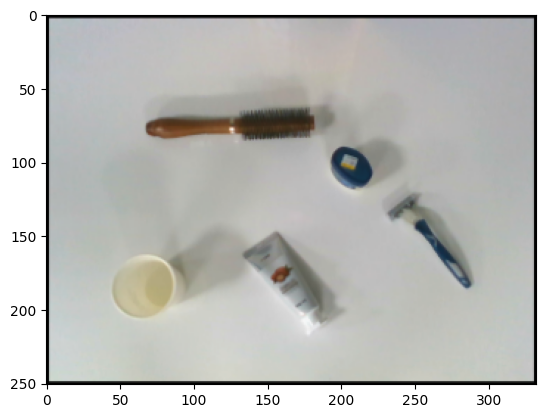

In [65]:
plt.imshow(imgs[0][116:367, 162:495])

In [69]:
H, W = 251, 333
for env in ['Coffee', 'Dining', 'Office', 'Bathroom']:
    fimg = np.ones([(H * 2 + 70) * len(result[env].keys()), (W * 12), 3])
    fig = plt.figure(figsize=(15, 15))

    for si, scene in enumerate(result[env].keys()):
        scores = result[env][scene]['score']
        imgs = result[env][scene]['rgb']
        expects = result[env][scene]['expect']
        #nobgs = result[env][scene]['nobg']


        img_cat = np.concatenate([im[116:367, 162:495]/255. for im in imgs], 1)
        expect_cat = np.concatenate([im[116:367, 162:495] for im in expects], 1)
        fimg[(H*2+70)*si: (H*2+70)*si + H, :img_cat.shape[1]] = img_cat
        fimg[(H*2+70)*si + H+20: (H*2+70)*si + H + H+20, W:img_cat.shape[1]] = expect_cat[:,W:]/255.
    #plt.imshow(fimg)
    #plt.show()
    cv2.imwrite('result_%s.jpg'%env, cv2.cvtColor((fimg*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [6]:
import pickle

In [5]:
with open('result.pkl', 'rb') as f:
    r = pickle.load(f)

In [6]:
for env in ['Coffee', 'Dining', 'Office', 'Bathroom']:
    print(env)
    for scene in r[env].keys():
        print(scene)
        print(r[env][scene]['score'])
    print()

Coffee
S1
[0.29195285, 0.5653271, 0.6856415, 0.69347924]
S2
[0.38342413, 0.5473263, 0.92135006, 0.92716557]
S3
[0.29266426, 0.44212428, 0.39599696, 0.61823434, 0.6556997, 0.69789493, 0.93751496]
S4
[0.1748965, 0.45638508, 0.4222254, 0.5386881, 0.6092331, 0.6994109, 0.87774277, 0.7907017]
S5
[0.05781535, 0.5710705, 0.71320784, 0.72681785, 0.85435665, 0.83057946, 0.77355695, 0.86985034, 0.6900024, 0.8795075]

Dining
S1-
[-0.17343499, 0.16540292, 0.44823346, 0.57855266, 0.5635533, 0.66915655, 0.37258622]
S2
[0.15704039, 0.51267844, 0.7372416, 0.8104936, 0.84176886, 0.88065374]
S3
[-0.012402313, 0.3902212, 0.9178888]
S4
[0.0035240334, 0.049917042, 0.3468902, 0.60898036, 0.86464757]
S5
[0.013545459, 0.29563168, 0.45807725, 0.86937976, 0.92972714]

Office
S1
[0.14572985, 0.46633974, 0.7312997, 0.91890424, 0.93490267, 0.833793]
S2
[0.026617995, 0.37006816, 0.6322663, 0.7129662, 0.7853492, 0.62624085, 0.82955545, 0.7871457]
S3
[0.3757953, 0.6282241, 0.8023208, 0.97476745, 0.5924548, 1.0328046]

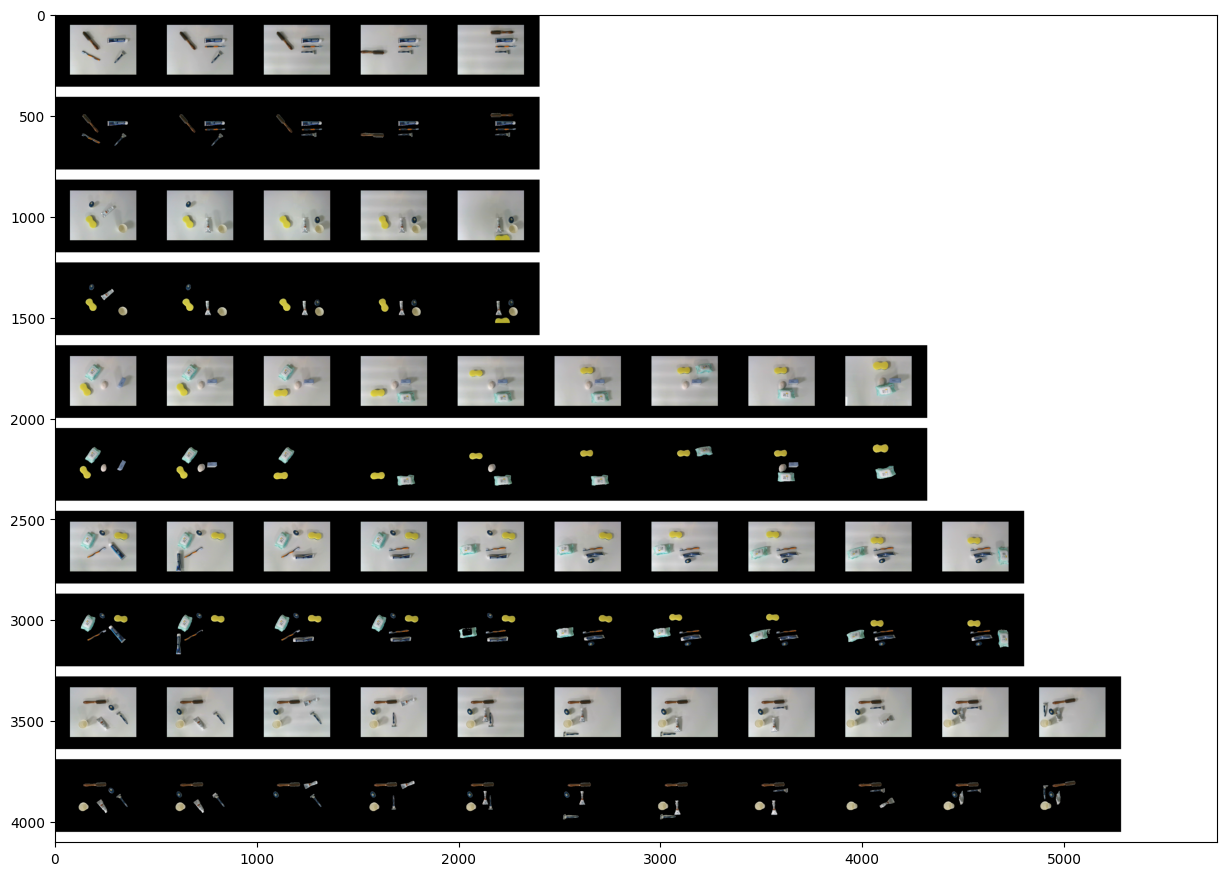